# Part 1: Old scheduler code

In [154]:
#importing essential libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

In [155]:
#Helper functions for Q1

#Here, I am using a nested list transposing function I orignally wrote for minerva's post summer assesment in 2020 and cited it in other CS
#assignemnt classes previously as CS50 Logical thinkin assignment (Badra, 2020). Notice that I am citing myself here as if I'd rewrote the
#this function from sratch it would have likely, unintentionally, looked the same as the one I wrote before anyways (#selfawareness).

#Transposing rows to columns (in this case) and can be used for columns to rows as well
def RowsToColumns(ColumnsLst):
    cell = 0
    RowsLst = []
    for i in range(len(ColumnsLst[0])):
        temp_row = []
        for column in ColumnsLst:
            temp_row.append(column[cell])
        cell += 1
        RowsLst.append(temp_row)
    return RowsLst

In [156]:
#OLD: lst tasks format -> ["id" (int), "parent_description" (str), "duration" (float),"subtasks" (lst of str), "possible_multitasks" (lst of int), "depends_on" (lst of int), "overlaps" (lst of int)
# "multi_tasking" (bool), "status"(str), "due_time"(str), "importance"(int), "work"(bool)]

#NEW: lst tasks format -> ["id" (int), "parent_description" (str), "allotted_tomatoes" (float), "left_tomatoes" (float), "subtasks" (lst of str), "depends_on" (lst of int), "due_time" (str), "importance" (int), "multi_tasking" (bool), "work"(bool),
#"overlaps" (lst of int)], "possible_multitasks" (lst of int), "priority_score" (float)]

#, [dependency_ids], "HH:MM DD/MM/YY", importance_int, multi_tasking_bool, work_bool, [], [], 0],

tasks_lst = [[0, "CS110 Final", 24, 24, ["Q1", "Q2", "integrate new algorithm","Q3", "Q4"], [11, 13, 16], "23:00 16/12/21", 9, False, True, [], [], 0],
         [1, "NS110L Final", 10, 10, ["research", "paper", "brochure"], [13], "23:00 16/12/21", 8, False, True, [], [], 0],
         [2, "CS111 Final", 16, 16, ["revise euler's method", "revise probability","Q3", "Q4", "review mo's Q1 & Q2", "compile"], [4, 13, 15], "19:00 17/12/21", 8, False, True, [], [], 0],
         [3, "NS110L HW", 10, 10, ["Q1", "Q2", "Q3", "Q5", "Q6", "Q7"], [1, 13, 19], "04:00 17/12/21", 5, False, True, [], [], 0],
         [4, "CS111 14.2 makeup work", 1.5, 1.5, ["breakout", "reflect"], [13, 19], "20:59 16/12/21", 4, False, True, [], [], 0],
         [5, "Minerva x EdUSA Egypt session", 4, 4, ["revise notes", "session"], [9, 13], "21:00 17/12/21", 8, False, True, [], [], 0],
         [6, "City experience makeup work 1", 1, 1, ["research", "write"], [13], "23:00 18/12/21", 3, False, True, [], [], 0],
         [7, "City experience makeup work 2", 1, 1, ["research", "write"], [13], "23:00 18/12/21", 3, False, True, [], [], 0],
         [8, "City experience makeup work 3", 1, 1, ["research", "write"], [13], "23:00 18/12/21", 3, False, True, [], [], 0],
         [9, "Meeting w/ Fatou", 2, 2, ["plan the sesh", "meeting"], [13], "22:30 13/12/21", 7, False, True, [], [], 0],
         [10, "CS111 Technical interview", 2, 2, ["go to a quiet room", "interview"], [12, 13, 15, 18], "21:00 13/12/21", 10, False, True, [], [], 0],
         [11, "CS110 OH", 2, 2, ["prep questions", "meeting"], [13, 16], "18:00 14/12/21", 6, False, True, [], [], 0],
         [12, "CS111 mock", 3, 3, ["prep questions", "mock"], [13, 15], "21:00 12/12/21", 8, False, True, [], [], 0],
         [13, "Plan the week", 2, 3, ["approximate assignment times", "plan"], [17], "15:00 08/12/21", 9, False, True, [], [], 0],
         [14, "CS110 13.1 makeup work", 4, 4, ["watch the recording", "write the reflections"], [13], "10:59 14/12/21", 4, False, True, [], [], 0],
         [15, "CS111 review", 8, 8, ["Limits", "Diffrentiation", "Integration", "Probability"], [13], "09:00 13/12/21", 8, False, True, [], [], 0],
         [16, "CS110 review", 4, 4, ["review greedy", "review DP"], [13, 14], "09:00 16/12/21", 8, False, True, [], [], 0],
         [17, "run 1", 4, 4, ["get dressed", "run", "change"], [], "08:00 08/12/21", 10, False, False, [], [], 0],
         [18, "run 2", 4, 4, ["get dressed", "run", "change"], [], "10:00 15/12/21", 10, False, False, [], [], 0],
         [19, "run 3", 4, 4, ["get dressed", "run", "change"], [], "09:00 17/12/21", 10, False, False, [], [], 0],
         [20, "Laundry", 1, 1, ["bring coins from emart", "washer", "dryer"], [13], "21:00 14/12/221", 4, True, False, [], [], 0],
         [21, "Submit WS hours", 0.25, 0.25, ["recall tasks you've done", "submut"], [13], "23:00 17/12/21", 6, True, False, [], [], 0],
         [22, "Technical interview", 24, 24, ["tech prep", "behavioral prep", "mock1", "mock2", "mock3", "mock4", "mock5", "mock6", "interview", "post interview note"], [13, 17], "11:00 10/12/12", 10, False, True, [], [], 0],
         [23, "Farewell @ Sky", 6, 6,["buy them something", "find the group", "have dinner there"], [], "23:30 17/12/21", 4, True, False, [], [], 0]
]

#transposing the tasks lst in order to assign each column to a key in the tasks dict as values
tasks_lst_transposed = RowsToColumns(tasks_lst)
#transforming the tasks lst to a dict for ease of access later in the program
tasks_keys = ["id", "parent_task_description", "allotted_tomatoes", "left_tomatoes", "subtasks", "depends_on", "due_time", "importance", "multi_tasking", "work", "overlaps", "possible_multitasks", "priority_score"]

#converting the nested lst of tasks to a dict 
tasks_untouched = {tasks_keys[key_index]:tasks_lst_transposed[key_index] for key_index in range(len(tasks_keys))}

#dict to df for table display
tasks_df = pd.DataFrame(tasks_untouched)
tasks_df

,id,parent_task_description,allotted_tomatoes,left_tomatoes,subtasks,depends_on,due_time,importance,multi_tasking,work,overlaps,possible_multitasks,priority_score
0,0,CS110 Final,24.00,24.00,"[Q1, Q2, integrate new algorithm, Q3, Q4]","[11, 13, 16]",23:00 16/12/21,9,False,True,[],[],0
1,1,NS110L Final,10.00,10.00,"[research, paper, brochure]",[13],23:00 16/12/21,8,False,True,[],[],0
2,2,CS111 Final,16.00,16.00,"[revise euler's method, revise probability, Q3...","[4, 13, 15]",19:00 17/12/21,8,False,True,[],[],0
3,3,NS110L HW,10.00,10.00,"[Q1, Q2, Q3, Q5, Q6, Q7]","[1, 13, 19]",04:00 17/12/21,5,False,True,[],[],0
4,4,CS111 14.2 makeup work,1.50,1.50,"[breakout, reflect]","[13, 19]",20:59 16/12/21,4,False,True,[],[],0
5,5,Minerva x EdUSA Egypt session,4.00,4.00,"[revise notes, session]","[9, 13]",21:00 17/12/21,8,False,True,[],[],0
6,6,City experience makeup work 1,1.00,1.00,"[research, write]",[13],23:00 18/12/21,3,False,True,[],[],0
7,7,City experience makeup work 2,1.00,1.00,"[research, write]",[13],23:00 18/12/21,3,False,True,[],[],0
8,8,City experience makeup work 3,1.00,1.00,"[research, write]",[13],23:00 18/12/21,3,False,True,[],[],0
9,9,Meeting w/ Fatou,2.00,2.00,"[plan the sesh, meeting]",[13],22:30 13/12/21,7,False,True,[],[],0


In [157]:
class Priority_queue:
    """
    A min-heap implementation of a priority queue and heapsort. Using the sorted_queue method, it can be turned into a max-heap

    Attributes:
        self.lst:
            a list of tuples of all tasks' computed priority_score values and id represented in this format: (task_id, task_priority_score)
    Additional notes:
        This implements a priority queue with min heap, where min priority node at at the root node and max priority at one of
        the sterile/non-leaf nodes.however this code is adjusted to account for using a priority queue with a tuple of the task id and the
        priority_score instead of just the priority score alone
    """
    def __init__(self):
        """initialize attributes and import the math function for the floor method"""
        import math
        self.lst = []
    
    def display(self):
        """prints the list representation of the heap before or after heapify depending on run order"""
        return self.lst

    def swap(self, i, j):
        """swaps nodes at any two given indices"""
        self.lst[i], self.lst[j] = self.lst[j], self.lst[i]

    def check_left(self, index):
        """checks if a node has a left child"""
        if 2*index + 1 <= len(self.lst) - 1:
            return True
        else:
            return False
    def check_right(self, index):
        """checks if a node has a right child"""
        if 2*index + 2 <= len(self.lst) - 1:
            return True
        else:
            return False

    def parent(self, index):
        """returns the parent node for any given child node at index"""
        if index != 0:
            return self.lst[math.floor((index - 1) /2)]

    def left(self, index):
        """return left child nodes for a given parent at index"""
        if self.check_left(index):
            return self.lst[2*index + 1]
    def right(self, index):
        """return the right child nodes for a given parent at index"""
        if self.check_right(index):
            return self.lst[2*index + 2]

    def parent_index(self, index):
        """return the parent node index for any given child at index"""
        if index != 0:
            return math.floor((index - 1) /2)

    def left_index(self, index):
        """return left child node indices for any given parent at index"""
        if self.check_left(index):
            return 2*index + 1
    def right_index(self, index):
        """return right child node indices for any given parent at index"""
        if self.check_right(index):
            return 2*index + 2


    #returns indices of all the nodes without any left or right children  (non-leaf nodes)
    #
    def steriles(self):
        """ 
        returns indices of all the nodes without any left or right children (non-leaf nodes)

        Additional notes:
            this mehtod is EXTREMELY important in searching for the max priority node. this narrows down the search process
            to include the steriles only
        """
        sterile_node_indices = []
        for node_index in range(len(self.lst)):
            if not self.check_left(node_index) and not self.check_right(node_index):
                sterile_node_indices.append(node_index)
        return sterile_node_indices

    def parents_indices(self, index):
        """return the indices of all parent of any given child node in a heap, except for the root node"""
        output_indices = []
        while self.parent_index(index) != None:
            output_indices.append(self.parent_index(index))
            index = output_indices[-1]
        return output_indices
    
    def bubble_min_up(self, child_index):
        """bubbles up the max element at any tree branch until it reaches the top or its sorted place"""
        local_child = self.lst[child_index]
        #print("passed child index:", child_index, ",lst:", self.lst, ",local child:", local_child)

        #storing all the parents indices for the given child
        parent_indices = self.parents_indices(child_index)
        
        #bubbling up the child to the top
        #print("child:", local_child, "parents:" ,parent_indices)
        for parent_index in parent_indices:
            parent = self.lst[parent_index]
            #print("parent_index:", parent_index)
            if local_child[1] <= parent[1]:
                self.swap(child_index, parent_index)
                child_index = parent_index
                #print(local_child, "at index", child_index, "AND", parent, "at index", parent_index, "swapping!")
                #print("lst after swapping:", self.lst)
                #print("#############################")
        #print("lst after bubbling the child", self.lst)

    def min_heapify(self, index):
        """ensures that ALL the parents (at the upper levels) of a given node at index maintain the min heap property"""
        if index < 0:
            print("Only positive indices are allowed!", "Index rejected:", index)
            return "-ve index error"
        parent_indices = self.parents_indices(index)
        #child = self.lst[index]
        branch = [index] + parent_indices
        #sorting the branch ascendingly (max at bottom) by bubbling up each child in the branch, starting from the bottom
        for node_index in branch:
            #print("current_child_index:", node_index)
            self.bubble_min_up(node_index)

    def adopt(self, adoptee):
        """
        this function adopts a node at the end of the heap. 

        Additional notes:
            Notice that it can't add the element at an index because there isn't any use for that with priority queues
        """
        if adoptee[1] < 0:
            print("Only positive adoptee nodes are allowed!", "Adoptee node rejected:", adoptee)
            return "-ve node error"
        self.lst.append(adoptee)
        self.min_heapify(len(self.lst) - 1)
    
    def lst_to_heap(self, lst):
        for node in lst:
            self.adopt(node)
        
    
    def delete(self, index):
        """
        deletes a node at a given index through swapping it with the last element in the heap and then heapifying the whole tree again by
        applying heapify to all the sterile/non-leaf nodes afterwards

        Todos:
            I heapify the whole tree because for now, the program is agnostic towards the descendents of each node (I tried to write a
            method but failed) have we known the descendents, we'd have cut the runtime by half as we'd only heapify the sterile descendents of the
            node at the deleted node index, instead of heapifying the whole tree
        """
        deletee = self.lst[index]
        self.swap(index, len(self.lst) - 1)
        del self.lst[-1]

        #heapifying the tree after deleting
        steriles = self.steriles()
        for sterile_node in steriles:
            self.min_heapify(sterile_node)

    def pop(self, index):
        """deletes a node at index and and returns its value (pop) and then heapify the tree"""
        poppee = self.lst[index]
        self.delete(index)
        return poppee
    
    def max_priority_index(self):
        """returns the index of the max priority node (between the sterile/non-leaf nodes in the heapified lst)"""
        #reversing the list to ensure returning the most remote max element/sterile max node to ease the heapifying process later by      
        steriles = list(reversed(self.steriles().copy()))
        max = -1
        max_index = "NA"
        for sterile_node_index in steriles:
            if self.lst[sterile_node_index][1] >= max:
                max_index = sterile_node_index
                max = self.lst[sterile_node_index][1]
                #print("current_max_index:", sterile_node_index, "max_value:", max)
        return max_index

    def min_priority_index(self):
        """return the index of the min priority node: root node"""
        return 0

    def max_priority(self):
        """return the index of max priority node"""
        return self.lst[self.max_priority_index()]
    def min_priority(self):
        """return the index of min priority node"""
        return self.lst[self.min_priority_index()]

    def pop_max(self):
        """pop the max priority node in the whole heap and then apply heapify (applied in pop)"""
        if len(self.lst) == 0:
            print("The queue is empty!")
            return "Empty queue error"
        max_index = self.max_priority_index()
        return self.pop(max_index)

    def pop_min(self):
        """pop the min priority node in the whole heap and then apply heapify (applied in pop)"""
        if len(self.lst) == 0:
            print("The queue is empty!")
            return "Empty queue error"
        min_index = self.min_priority_index()
        return self.pop(min_index)


    def sorted_queue(self):
        """
        returns the queue sorted in ascending order according to their priorities

        Additional notes:
            can only be called after the lst_to_heap method is called
        """
        import sys
        if len(self.display()) == 0:
            print("The queue is empty!")
            return "Empty queue error"
            sys.exit()
        sorted_nodes = []
        while len(self.display()) > 0:
            root_node = self.pop_min()
            #print(root_node)
            sorted_nodes.append(root_node)
        return sorted_nodes

In [158]:
class Time_ops:
    """
    time tracking operations as calculating elapsed time, time difference, elapsed days and printing time
    
    date format: "HH:MM DD/MM/YY"
    """
    def __init__(self):
        """initialize the class"""
        pass
        
    def month_to_days(self, month):
        """
        returns the number of days for any month given as int in the format of MM
        
        Additional notes:
            I am adapting this function from a code I wrote for Variables with LBA assignmnt last year for CS50 (Badra, 2020)
        """
        small_months = [4, 6, 9, 11]
        big_months = [1, 3, 5, 7, 8, 10, 12]
        months_lst = small_months + big_months + [2]
        months = {}
        for key in months_lst:
            if key in small_months:
                months[key] = 30
            elif key in big_months:
                months[key] = 31
            else:
                months[key] = 28.24255
        
        return months[month]

    def elapsed_months_to_days(self, month_str):
        """
        caclulates the days that passed to get to the current input month

        Additional notes:
            this method helps the time_difference method calculate the time time between any given dates through finding the number of days
            in any given month
        """
        month_int = int(month_str)

        days_passed = 0
        for month in range(1, month_int + 1):
            #print(month, months[month])
            days_passed += self.month_to_days(month)
        return days_passed

    def time_difference(self, current_time, task_id):
        """calculates the amount of time between now and any given task at id"""
        t1 = current_time
        t2 = self.tasks["due_time"][task_id]
        #print(t1, t2)

        hours_diff = 0

        hours1_str = t1.split()[0].split(":")
        hours1 = int(hours1_str[0]) + int(hours1_str[1])/60
        #print("hours1:", hours1)

        dates1_str = t1.split()[1].split("/")
        days1 = int(dates1_str[0]) + self.elapsed_months_to_days(dates1_str[1]) + int(dates1_str[2])*365
        hours1 += 24*days1


        hours2_str = t2.split()[0].split(":")
        hours2 = int(hours2_str[0]) + int(hours2_str[1])/60
        #print("hours2:", hours2)

        dates2_str = t2.split()[1].split("/")
        days2 = int(dates2_str[0]) + self.elapsed_months_to_days(dates2_str[1]) + int(dates2_str[2])*365
        hours2 += 24*days2
        
        return round(hours2 - hours1, 2)
    
    def time_addition(self, date_time, n_tomatoes):
        """adds a given number of tomatoes, as fraction of self.tomato_length, to any time given by "HH:MM DD/MM/YY"

        Additional notes:
            notice that this function doesn't assume that tasks have to begin and end on the same day, instead they can take as long as they need
            and the date will adjust accordingly
        """
        tomato_length = 25.0
        #in minutes
        duration = int(n_tomatoes * tomato_length)
        #print("duration:", duration)

        current_hours = int(date_time.split()[0].split(":")[0])
        #print("curennt_hours:", current_hours)
        current_minutes = int(date_time.split()[0].split(":")[1])
        #print("current_minutes:", current_minutes)
        current_day = int(date_time.split()[1].split("/")[0])
        #print("current_day:", current_day)
        current_month = int(date_time.split()[1].split("/")[1])
        #print("current_month:", current_month)
        current_year = int(date_time.split()[1].split("/")[2])
        #print("current_year:", current_year)

        extra_hours = duration // 60
        #print("extra_hours:", extra_hours)
        extra_minutes = duration - extra_hours*60
        #print("extra_minutes:", extra_minutes)
        
        extra_days = 0
        #print("extra_days:", extra_days)
        extra_months = 0
        #print("extra_months:", extra_months)
        extra_years = 0
        #print("extra_years:", extra_years)

        current_minutes += extra_minutes
        if current_minutes >= 60:
            current_minutes -= 60
            extra_hours +=1
        
        current_hours += extra_hours
        if current_hours >= 24:
            current_hours -= 24
            extra_days +=1



        days_in_current_month = self.month_to_days(current_month)
        current_day += extra_days

        #disabled time addition across months and years for now
        #if current_day >= days_in_current_month:
        #    current_day -= days_in_current_month
        #    extra_months +=1 
        #current_month += extra_months
        #if current_month >= 12:
        #    current_month -= 12
        #    extra_years +=1

        #assuming that we're limited to the 21st century
        #current_year += extra_years

        print(str(current_hours)+":"+str(current_minutes) + " " + str(current_day)+"/"+str(current_month)+"/"+str(current_year))
        return str(current_hours)+":"+str(current_minutes) + " " + str(current_day)+"/"+str(current_month)+"/"+str(current_year)

    def print_time(self, time):
        """returns the time in the format: "HHhMMm DD/MM/YY"""
        hours_str = time.split()[0].split(":")
        hours, minutes = hours_str[0], hours_str[1]
        date = time.split()[1]

        return hours + "h" + minutes + "m" + " " + time.split()[1]

In [159]:
 class Backend_update(Time_ops):
    """
    This class provides methods to updates the overlaps, possible_multitasks, and priority_score.
    The updaters (decide_overlap, decide_multitasks, and decide_priority) run in Scheduler.initialize() as the first step in Scheduler.plan()
    """
    def __init__(self, tasks_input, init_time, work_priority):
        super().__init__()
        self.tasks = tasks_input
        self.n_tasks = len(self.tasks["id"])
        self.time_now = init_time
        if work_priority:
            self.work_priority = True
        else:
            self.work_priority = False

    def tasks_duration(self, tasks_indices_lst):
        """
        returns the collective duartion of a group of tasks given by a list of their indices

        Additional notes: this method will be used to decide whether to multitask or not in the decide_multitask method
        """
        collective_duration = 0
        for task_index in tasks_indices_lst:
            collective_duration += tasks_untouched["allotted_tomatoes"][task_index]
        
        return collective_duration
    
    def decide_overlap(self):
        """fills in the overlaps values for each task with the ids of overlapping tasks, determined with the due_time"""
        for task_index in range(self.n_tasks):
            #print(self.tasks["overlaps"])
            overlapping_tasks = []
            task_time = self.tasks["due_time"][task_index]
            #for each given task, append all the overlapping tasks
            #determine if the task is overlapping if the time difference between the current task and the other task candidate is bigger
            #than or equal to zero, if the opposite, the difference is less than 0, then the cadndidate task comes before the current task
            #and they're overlapping relation is flipped
            for task_cand_id in range(task_index + 1, self.n_tasks):
                if self.time_difference(task_time, task_cand_id) >= 0:
                    overlapping_tasks.append(task_cand_id)
                    
            self.tasks["overlaps"][task_index] = overlapping_tasks


    def decide_multitask(self):
        """
        updates the possible_multitask value for each task with indices of multitaskable tasks with each given task.
        decides upon multitaskable tasks using the factors: work, multi_tasking, overlaps, and duration  
        """
        #go through each task, checking overlaps, other task's multi_task and work, current task mulit_task and duration! 
        #now what
        for task_index in range(self.n_tasks):
            #store the parent candidate duration for comparison later with the collective duration of candidate tasks for multitasking
            parent_task_duration = self.tasks["left_tomatoes"][task_index]

            #print(self.tasks["possible_multitasks"])
            multi_tasks = []
            for overlap_task_index in self.tasks["overlaps"][task_index]:
                cand_task_duration = self.tasks["left_tomatoes"][overlap_task_index]
                #only allow multitasking for overlapping tasks that are mutlitaskable and aren't work (as indicated by the user)
                if (self.tasks["work"][overlap_task_index] == False) and (self.tasks["multi_tasking"][overlap_task_index] == True):
                    #also check that the current task allows overlap
                    #notice that the task due earlier gets the other overlapping and multi_tasking-qualifying task appended to it
                    if self.tasks["multi_tasking"][task_index] == True:
                        #I wrote a seperate if statement here instead of an and for clarity and to clearly explain the key logic here
                        #ONLY append the task candidate for multitasking if adding would still mean that the parent task ends last or at
                        #the same time as the last multitasking task
                        #in other words, the collective duration of as multitasking tasks for any given ask HAS to be less than or equal
                        #the duration of the parent task
                        if self.tasks_duration(multi_tasks) + cand_task_duration <= parent_task_duration:
                            multi_tasks.append(overlap_task_index)
                    
            self.tasks["possible_multitasks"][task_index] = multi_tasks


    def depends_on_score_update(self):
        """
        depends_on sub priority score calculation
        assigns the highest priority value (10) for values that are most mentioned in depends_on
        """
        all_depend_ons = self.tasks["depends_on"]
        dependees = []
        for dependee in all_depend_ons:
            dependees += dependee

        #populating the dependees into a dict to count them
        dependee_dict = {}
        for task_ref in dependees:
            if task_ref in list(dependee_dict.keys()):
                dependee_dict[task_ref] += 1
            else:
                dependee_dict[task_ref] = 1

        #check if some task have no other dependent tasks and assign 0 to their value
        for index in self.tasks["id"]:
            if index not in list(dependee_dict.keys()):
                dependee_dict[index] = 0

        #finding the most and least repeated dependecy for dependency score mapping next
        dependencies_freq = list(dependee_dict.values())
        max_dependencies = max(dependencies_freq)
        min_dependencies = min(dependencies_freq)

        for index in self.tasks["id"]:
            dependees = dependee_dict[index]
            #this direct linear mapping method works in a similar way to the due_time one above
            #eqn: depends_on_score = (10/max_dependencies-min_dependencies)*dependees + (10*min_dependencies/(min_dependencies-max_dependencies))
            #the mapping process and graphs are included in a cell below
            depends_on_score = round(dependees*(10/(max_dependencies-min_dependencies)) + (10*min_dependencies/(min_dependencies-max_dependencies)), 2)
            
            #adding the depends on priority score to the overall priority score (1-50)
            self.tasks["priority_score"][index] += depends_on_score
            #print("dependees:", dependees, "depends_on_score:", depends_on_score)
    
    def decide_priority(self):
        """calculates the priority score (1-60) of each task based on work, importance, due_time, allotted_tomatoes, and possible_multitasks """     
        for task_index in range(self.n_tasks):
            composite_task_priority = 0

            #work sub priority score calculation
            #decide whether to prioritize work or not depending on the work_priority bool input
            #if prioritizing work, then assign a sub priority value of 10 for work tasks, and 0 for the rest.
            #if not prioritizing work, then vice verse
            if self.tasks["work"][task_index] == True and self.work_priority:
                composite_task_priority += 10
                #print(self.tasks["work"][task_index], composite_task_priority)
            #############################################################################

            #importance sub priority score calculation
            #print("task importance:", self.tasks["importance"][task_index], ",current_composite:", composite_task_priority)
            composite_task_priority += self.tasks["importance"][task_index]
            #print("importance lst:", self.tasks["importance"], ",current_composite:", composite_task_priority)
            #############################################################################

            #due_time sub priority score calculation
            #calculating the time difference between now and each given task and finding the furthest and closest tasks
            task_time_left = self.time_difference(self.time_now, task_index)
            tasks_time_left = [self.time_difference(self.time_now, candidate_index) for candidate_index in range(self.n_tasks)]
            #print(tasks_time_left)
            max_time, min_time = max(tasks_time_left), min(tasks_time_left)

            #this line maps the closest/past due task to a due_time_score of 10 (max) and the furthest task to 0 (min)
            #through this equation: due_time_score = time_till_task*(10/min_time-max_time) + 10*max_time/max_time-min_time
            #the graph for this equation is included in a sepraten cell
            due_time_score = round(((10/(min_time-max_time))*task_time_left + (10*max_time/(max_time-min_time))), 2)
            composite_task_priority += due_time_score
            #print(task_index, due_time_score, composite_task_priority)
            #############################################################################

            #duration sub priority score calculation
            #this method follows the same priority calculation method using a linear mapping as used with the due_time
            task_duration = self.tasks["allotted_tomatoes"][task_index]
            #print(self.tasks["allotted_tomatoes"])
            max_duration, min_duration = max(self.tasks["allotted_tomatoes"]), min(self.tasks["allotted_tomatoes"])

            duration_score = round(((10/(min_duration-max_duration))*task_duration + (10*max_duration/(max_duration-min_duration))), 2)
            composite_task_priority += duration_score
            #print(task_index, duration_score, composite_task_priority)
            #############################################################################
            
            #possible_multitasks sub priority score calculation
            #give a higher priority for task with the largest number of possible_multitasks
            #print("possible_multitasks:", self.tasks["possible_multitasks"][task_index], ",current_composite:", composite_task_priority)
            task_n_possible_multitasks = len(self.tasks["possible_multitasks"][task_index])
            n_all_possible_multitasks = [len(self.tasks["possible_multitasks"][index]) for index in range(self.n_tasks)]
            
            max_possible_multitasks, min_possible_multitasks = max(n_all_possible_multitasks), min(n_all_possible_multitasks)
            #print(max_possible_multitasks, min_possible_multitasks)

            if min_possible_multitasks-max_possible_multitasks == 0:
                possible_multitasks_score = 10
            else:
                possible_multitasks_score = round(task_n_possible_multitasks*(10/(max_possible_multitasks-min_possible_multitasks)) + (10*min_possible_multitasks/(min_possible_multitasks-max_possible_multitasks)), 2)

            #print(possible_multitasks_score)
            composite_task_priority += possible_multitasks_score
            #############################################################################
            
            self.tasks["priority_score"][task_index] = composite_task_priority

        self.depends_on_score_update()

# Part 2: New scheduler discussion and code

# Q1: Critical analysis of DLOM1  
In the first assignment implementation, I made a few assumptions:  
1. The user is satisfied enough with only a rank of the tasks' priorities and a rough schedule for executing the tasks, rather than a realistic schedule that can run in real-time. This means that instead of running the schedule for the amount of time available at hand, it has to be run for the whole day. As a result, the user can't pause the schedule nor divide it into different parts. While this was useful enough to help the user prioritize tasks, using the computed priority score, to mitigate user bias against less desirable tasks with high priority.    
2. I assumed that informing the user of the computed priority for each task would be enough to mitigate their bias towards less desirable tasks to get them started on these tasks. Meanwhile, since I used it from my practical tests for the scheduler, I noticed that being informed of the priority ranking is not enough. I noticed that often, the same daunting tasks I was aware of their importance just rank highest. Thus, the scheduler merely acts as an automated reminder that the long and daunting tasks I am avoiding are important. However, it doesn't necessarily help me breakdown or tackle these tasks as of the first version.  

While I assumed other assumptions in the original scheduler as treating subtasks as child tasks that inherit its parent's properties, which strips subtasks from having their independent priority, I wouldn't address this problem here. The sole reason for leaving this assumption is that solving it will negatively affect the user experience when inputting the tasks. Currently, after inputting the tasks into the tasks_lst, the user has to go look for the tasks that depends_on each inputted task, which requires the user to search the list n_tasks times manually looking for dependencies! If we separate the subtasks from the tasks, the number of tasks would increase, and the user would have to search the list an additional n_tasks times to look for subtasks of each task. If we have 50 items on the scheduler, the user must search the 50 items 50*2 times! The solution to this is implementing a user interface with a graph-like structure where tasks can be nodes and edges can be dependency or subtask relations. Another problematic assumption I had was that any two overlapping non-work tasks marked as multi-taskable can be executed together. However, in real life, this lead to mutlitasking items in different locations. To solve this we can use google maps API to assign a location for each task and access the user's coordinates at the time of running. If the user is within a set range of the two qualifying multitasks's assigned lcoations or they both don'y a location, then they can be multitasked. In the meantime, this is beyond the scope of this assignment, so I will focus on the solution for the two assumptions above as follows:  
1. For the first assumption, we can solve this by allowing the schedule to run for an input of the time the user currently has only, pause, save the progress and wait for the subsequent execution when the user has more time, and repeat until all the tasks are executed.  
2. For the second assumption, I will solve this problem by implementing the principles of #breakitdown by breaking down the tasks into the smallest tractable components that can fit into any given amount of time the user has. Here, the schedule will prioritize tasks with the highest computed priority value.  

*Thus, my optimal scheduler is a one that effectively mitigates my bias towards lengthy and less desirable tasks.*

The previous two solutions will be implemented as follows:  
We define a task's computed priority_score as the profit value that we gain when we execute it. Accordingly, given that, at each run, we have a constrain of available_time that the user inputs, then this can be framed as a knapsack problem! In the knapsack thief problem, the thief has a sack of a limited capacity, and they're trying to maximize the value of stolen items (#analogies). Here, the knapsack capacity is the available_time the user has, and we execute the tasks that give us the maximum collective profit possible, given our sack size. This would allow the user to maximize on the profit return of their input available_time, which simultaneously breaking down tasks, making them less daunting (#psychologicalexplanation and #biasmitigation) 


word count: 488 words

# Q2: Improved algorithmic strategies

### A. Improvements in psuedocode
Design an optimal scheduler and write the new algorithmic strategies in pseudocode. Make sure tocarefully explain any assumptions you make, including what data structures are best suited for each of these strategies.

As discussed in Q1, implementing a knapsack algorithm would help break down tasks and allow the user to excecute the schedule given their amount available_time rather than all at once. In the 0-1 knapsack variation, we assume that tasks are not divisible. Accordingly, I thought of two different implementations of knapsack 0-1 and one variation of fractional knapsack as I will explain and implement below:
1. Greedy 0-1 knapsack
- sort tasks by computed priority score (profit value) in descending order
- while there's available_time:
    * choose the highest profit tasks that takes no more than the available_time left
    * increment the current profit value
    * decrement the available_time by the amount taken by the chosen task
- return the selected tasks and available_time
2. Dynamic programming (DP) tabulation (bottom-up) 0-1 knapsack
- In table[][], we consider all the possible times from 1 to available_time. The value at table[index][task_priority] will denote the the maximum value with task_priority's weight on the range of all values from 1 to index. Thus, if we consider task_priority_index to be the task_priority on the index row, we can populate the columns that have priority/proft value > task_priority-index. Here we have two scenarioes. Either fill "task_priority-index" in the given column or don't fill "task_priority-index" in the given column.
- Then, we take the maximum of these two resulting outcomes (possiblilites). In other words, if we don't fill the "index" "priority" in the priority column, then table[index][task_priority] will be the value of priority/profit at task_priority + the value of the column with a weight task_priority-index on the preceding row. At the end, we evaluate the maximum of the two possibilites to populate the current state.
- backtracking
3. Greedy fractional knapsack
- calculate the profit per time value for each task
- sort tasks by the computed profit per time value in descending order
- while there's available_time:
    * choose the highest profit tasks that takes no more than the available_time left
    * increment the current profit value
    * decrement the available_time by the amount taken by the chosen task
- if any available_time is left, execute as much of the next task in the sorted list as possible (execute a fraction)
- return the selected tasks and available_time



- To approach the optimal scheduler, I considered embedding the DP 0-1 knapsack algorithm into my code as it demonstrated the highest profit value with experimentation. However, as shown below, it aslo demonstrated the highest runtime. Additionally, while greedy_01_knapsack and greedy_fractional_knapsack return the recommended tasks already sorted according to their priority, the dp_01_knapsack doesn't and also doesn't allow for breaking down the tasks. The sorting within both of greedy_01_knapsack and dp_01_knapsack use python's sorted() method that has a computational complexity of 0(nlogn). Looping over the returned list to execute tasks with the highest probability will take 0(n), then the overall time complexity for using the list returned by greedy_01_knapsack or greedy_fractional_knapsack to access the highest priority element is O(n*logn) as n*logn factor dominates over the n factor from the last loop as the input gets very large.  
On the other hand, building a heap takes O(n) and each call for heapify takes O(nlogn), and popping takes 0(1) then the overall time complexity is O(n*logn). Thus, for this version of the scheduler, I will use a python list (implemented in python as a dynamic array data) data structure as it still has an asymptotic time complexity of O(n*logn) as the binary heap, but is much easier to debug. Also, using the same list instead of populating it into a heap will give us the advantage of operating in place, thus saving memory and reducing time complexity by half as the number of tasks gets very big.  

I will achieve this by simply passing the list of tasks with their computed priority value along with the available_time the user has to the function `greedy_fract_sack(tasks_sack, available_time)` shown below. Then, the function will return the ids of tasks that will give the highest collective profit give the available_time in order. While experimentation showed dp_01_knapsack to achieve a higher profit value than greedy_01_knapsack and greedy_fract_sack, the difference in the profit between the DP approach and the fractional one was almost neglegible as shown in profit plots below. Additionally, as DP approach uses more memory for tabulation and is shown below to have the highest runtime of all three algorithms, by far, then the greedy_fract_sack would be better in this case as it has a lower experimental runtime, space complexity and almost the highest profit return.

### B. Improvements in python
Implement your new algorithmic strategies in working Python code. Make sure to demonstrate that your code works as intended and provide at least one test case. Comment on what the different outputs tell you about the algorithmic strategies.

In [160]:
#plain greedy 0-1 knapsack
def greedy_01_sack(tasks_sack, available_time):
    """
    sorts the sack by profit, O(n*logn), in ascending order and goes throu

    Parameters:
        - tasks_sack (dict): {task_id: (task_tomatoes_left, priority_score)}
        - available_time: number of pomodoro blocks in multiples of 25 minutes
    Returns:
        - out_tuple
            -out_tuple[0] (list): ids of selected tasks
            -out_tuple[1] (float): total profit of the selected tasks
    """
    chosen_tasks = []
    total_profit = 0

    sorted_tasks_sack = {a: b for a, b in sorted(tasks_sack.items(), key=lambda item: item[1][1], reverse = True)}
    for task_cand_id in sorted_tasks_sack:
        #print(task_cand_id, sorted_tasks_sac[task_cand_id])
        task_duration = sorted_tasks_sack[task_cand_id][0]
        task_profit = sorted_tasks_sack[task_cand_id][1]
        #print(task_duration)
        if available_time - task_duration >= 0:
            available_time -= task_duration
            chosen_tasks.append(task_cand_id)
            total_profit += task_profit
    
    return chosen_tasks, total_profit

#fractional greedy knapsack
def greedy_fract_sack(tasks_sack, available_time):
    """
    returns the ids resulting in the highest combined profit value within the sack, given the available time

    Parameters:
        - tasks_sack (dict): {task_id: (task_tomatoes_left, priority_score)}
        - available_time: number of pomodoro blocks in multiples of 25 minutes
    Returns:
        - out_tuple
            -out_tuple[0] (list): ids of selected tasks
            -out_tuple[1] (float): total profit of the selected tasks
    """
    #chosen_tasks format -> [(id, fraction)]
    chosen_tasks = []
    total_profit = 0

    for task_cand_id in tasks_sack:
        profit_per_time = round(tasks_sack[task_cand_id][1] / tasks_sack[task_cand_id][0], 4)
        tasks_sack[task_cand_id].append(profit_per_time)
    
    sorted_tasks_sack = {a: b for a, b in sorted(tasks_sack.items(), key=lambda item: item[1][2], reverse = True)}
    #print(sorted_tasks_sack)
    
    for task_cand_id in sorted_tasks_sack:
        #print(task_cand_id, sorted_tasks_sack[task_cand_id])
        task_duration = sorted_tasks_sack[task_cand_id][0]
        task_profit = sorted_tasks_sack[task_cand_id][1]
        #print(task_duration)
        if available_time - task_duration >= 0:
            available_time -= task_duration
            chosen_tasks.append((task_cand_id, 1))
            total_profit += task_profit
        else:
            break

    #print("fractioned:", task_cand_id)
    last_task_fraction = available_time/task_duration
    #or just set it to zero
    available_time -= last_task_fraction * task_duration
    total_profit += round(last_task_fraction * task_profit, 4)

    chosen_tasks.append((task_cand_id, round(last_task_fraction, 4)))
    #print(last_task_fraction, available_time)
    #chosen_tasks.append((task_cand_id, 1))
    
    #print(available_time)
    return chosen_tasks, total_profit

#dp 0-1 knapsack
def dp_01_sack(tasks_sack, available_time):
    """
    returns the ids resulting in the highest combined profit value within the sack using tabulation (bottom up) dynamic programming

    Parameters:
        - tasks_sack (dict): {task_id: (task_tomatoes_left, priority_score)}
        - available_time: number of pomodoro blocks in multiples of 25 minutes
    Returns:
        - out_tuple
            -out_tuple[0] (list): ids of selected tasks
            -out_tuple[1] (float): total profit of the selected tasks
    """
    available_time = int(available_time)

    n_tasks = len(tasks_sack)
    
    task_lengths = [int(tasks_sack[task_id][0]) for task_id in tasks_sack]
    task_priorities = [int(tasks_sack[task_id][1]) for task_id in tasks_sack]
    
    selected_tasks = []
    total_profit = 0
    
    #########################################################################################################################################
    table = [[0 for time_instance in range(available_time + 1)] for time_instance in range(n_tasks + 1)]

    #building a dynamic programming table[][] bottom up
    for index in range(n_tasks + 1):
        for task_priority in range(available_time + 1):
            if index == 0 or task_priority == 0:
                table[index][task_priority] = 0
            elif task_lengths[index-1] <= task_priority:
                table[index][task_priority] = max(task_priorities[index-1]
                          + table[index-1][task_priority-task_lengths[index-1]],
                              table[index-1][task_priority])
            else:
                table[index][task_priority] = table[index-1][task_priority]
    
    #return max profit
    total_profit = table[n_tasks][available_time]
    #print(total_profit)
    out_total_profit = total_profit
    
    #backtracking to find the tasks
    #########################################################################################################################################
    
    task_priority = available_time
    for i in range(n_tasks, 0, -1):
        if total_profit <= 0:
            break
        #here, we backtrack to find the tasks we selected from the dp table
        #we either find the result from the top, top (table[i-1][task_priority]) 
        #or from (task_priorities[i-1] + table[i-1] [task_priority-task_lengths[i-1]])
        #in the situation, that we find it from the second one then the item is selected
        
        if total_profit == table[i - 1][task_priority]:
            continue
        else:
 
            #we foudnd a selected item
            selected_tasks.append(task_lengths[i - 1])
             
            #as the priority is selected, then its length is deducted
            total_profit = total_profit - task_priorities[i - 1]
            task_priority = task_priority - task_lengths[i - 1]
    return list(set(selected_tasks)), out_total_profit

In [161]:
def selection_difference(sack_01, sack_fractional):
    """
    prints the difference between the two sacks and compares the profit of the two sacks
    """

    #the first element [0] in the sacks is the ids, while the second is the profit value 
    sack_01_ids = set([task_id for task_id in sack_01[0]])
    sack_fractional_ids = set([task_tuple[0] for task_tuple in sack_fractional[0]])
    print("sack 01:", sack_01_ids)
    print("sack fractional:", sack_fractional_ids)

    print("sack 01 size:", len(sack_01_ids))
    print("sack fractional size:", len(sack_fractional_ids))
    print()


    not_in_sack_01_ids = sack_fractional_ids - sack_01_ids
    if not_in_sack_01_ids:
        print(not_in_sack_01_ids, "exists in sack_fractional but not in sack_01_ids")
    else:
        print("All of sack_01 exists in sack_fractional")

    not_in_sack_fractional_ids = sack_01_ids - sack_fractional_ids
    if not_in_sack_fractional_ids:
        print(not_in_sack_fractional_ids, "exists in sack_01 but not in sack_fractional_ids")
    else:
        print("All of sack_fractional exists in sack_01")
    
    print()

    overlap_percent = round(len(sack_01_ids & sack_fractional_ids) / float(len(sack_01_ids | sack_fractional_ids)) * 100, 3)
    print("Overlap: " + str(overlap_percent) + "%")
    ######################################################################################################################################

    profit_01 = sack_01[1]
    profit_fractional = sack_fractional[1]

    #solving dividing by zero error
    if not profit_01:
        profit_01 = 0.01
    if not profit_fractional:
        profit_fractional = 0.01
    
    print("sack 01 profit:", round(profit_01, 2), ",fractional sack profit:", round(profit_fractional, 2))
    if profit_01 == profit_fractional:
        print("The profit for 01 and fractional are identical!")
    elif profit_01 > profit_fractional:
        print("The 01 profit is larger by " + str(round(((profit_01/profit_fractional) - 1)*100, 2)) + "%")
    elif profit_fractional > profit_01:
        print("The fractional profit is larger by " + str(round(((profit_fractional/profit_01) - 1)*100,2)) + "%")

def tasks_sack_generator(n_tasks):
    """
    returns a sac of size n_tasks in this format: tasks_sack = {"task_id": (task_tomatoes_left, priority_score)}

    Notes:
        -Here, I assume a uniform distribution for the task priority and length whic is not realistic in real life, but that doesn't matter
        for the purpose of testing the algorithm

    Parameters:
        - n_tasks (int): the desired sack length
    Returns:
        -output_tuple
            - output_tuple[0] -> tasks_sack (dict): {"task_id": [task_tomatoes_left, priority_score]}
            - output_tuple[1] -> available_time (int): a random number of tomatoes between 1 and 30 (0.25 to 15 hours)
    """
    #assuming a maximum task legnth of 30 tomatoes -> 15 hours
    max_task_length = 30

    #the min priority for a task is 1 and the max is 60
    random_task_priorities_raw = np.random.uniform(low = 1, high = 60, size = n_tasks)
    random_task_priorities = random_task_priorities_raw.tolist()
    #random_task_priorities = [random.randrange(1, 60, 1) for task_priority in range(n_tasks)]

    #the min task length is 1/3 tomatoes -> 6.25
    random_task_lengths_raw = np.random.uniform(low = 0.25, high = max_task_length, size = n_tasks)
    random_task_lengths = random_task_lengths_raw.tolist()
    #random_task_lengths = [random.randrange(1, 30, 1) for task_priority in range(n_tasks)]

    #assuming that I operate for 15 hours each day, which means 15*2 tomatoes
    available_time = random.uniform(0.25, 30)

    task_tuples_lst = list(zip(random_task_lengths, random_task_priorities))
    task_lists = [list(current_tuple) for current_tuple in task_tuples_lst]

    task_sac_dict = {tuple_index:current_tuple for tuple_index, current_tuple in enumerate(task_lists)}
    return task_sac_dict, int(available_time)

In [162]:
sack_size = 100
tasks_sack_dict, available_time = tasks_sack_generator(sack_size)

print("Greedy 0-1 and Greedy fractional performance comparison\n")
selection_difference(greedy_01_sack(tasks_sack_dict, available_time), greedy_fract_sack(tasks_sack_dict, available_time))

Greedy 0-1 and Greedy fractional performance comparison

sack 01: {83, 78}
sack fractional: {2, 43, 76, 12, 83, 22, 86, 58}
sack 01 size: 2
sack fractional size: 8

{2, 43, 76, 12, 22, 86, 58} exists in sack_fractional but not in sack_01_ids
{78} exists in sack_01 but not in sack_fractional_ids

Overlap: 11.111%
sack 01 profit: 118.84 ,fractional sack profit: 354.79
The fractional profit is larger by 198.55%


In [163]:
def measure_runtime(runee_function, param1, param2):
    """
    measures runtime of a given runee_function
    """
    time_a = time.time()
    runee_function(param1, param2)
    time_b = time.time()

    return time_b-time_a

def plot_runtime(sack_size, n_samples):
    """
    This method plots the runtime for each of the 3 algorithms
    """
    sack_sizes = [sub_sack_size for sub_sack_size in range(1, sack_size + 1)]

    greedy_01_runtime = []
    dp_01_runtime = []
    greedy_fract_runtime = []

    for sub_sack_size in sack_sizes:
        #print("sub_sack_size:", sub_sack_size)
        temp_runtime_greedy_01 = 0
        temp_runtime_dp_01 = 0
        temp_runtime_greedy_fract = 0
        for sample in range(1, n_samples + 1):

            tasks_sack_dict, available_time = tasks_sack_generator(sub_sack_size)
            #print("tasks_sack_dict length:", len(tasks_sack_dict))
            #print("available_time:", available_time)

            temp_runtime_greedy_01 += measure_runtime(greedy_01_sack, tasks_sack_dict, available_time)
            temp_runtime_dp_01 += measure_runtime(dp_01_sack, tasks_sack_dict, available_time)
            temp_runtime_greedy_fract += measure_runtime(greedy_fract_sack, tasks_sack_dict, available_time)


            #print(temp_runtime_greedy_01, temp_runtime_dp_01, temp_runtime_greedy_fract)
    
        greedy_01_runtime.append(temp_runtime_greedy_01 / n_samples)
        dp_01_runtime.append(temp_runtime_dp_01 / n_samples)
        greedy_fract_runtime.append(temp_runtime_greedy_fract / n_samples)
        #print()
    

    plt.plot(sack_sizes, greedy_01_runtime, label = "greedy_01 runtime", color = "darkorange")
    plt.plot(sack_sizes, dp_01_runtime, label = "dp_01 runtime", color = "darkgreen")
    plt.plot(sack_sizes, greedy_fract_runtime, label = "greedy_fract runtime", color = "blue")

    plt.xlabel("Sack size (n)")
    plt.ylabel("Runtime (seconds)")

    plt.legend()
    plt.show()

    #return greedy_01_runtime, dp_01_runtime, greedy_fract_runtime

def plot_profit(sack_size, n_samples):
    """
    This method plots the profit value for each algorithm
    """
    sack_sizes = [sub_sack_size for sub_sack_size in range(1, sack_size + 1)]

    greedy_01_profit = []
    dp_01_profit = []
    greedy_fract_profit = []
    midline_lst = []

    for sub_sack_size in sack_sizes:
        """
        tasks_sack_dict, available_time = tasks_sack_generator(sub_sack_size)
        #print("tasks_sack_dict length:", len(tasks_sack_dict))
        #print("available_time:", available_time)

        temp_profit_greedy_01 = greedy_01_sack(tasks_sack_dict, available_time)[1]
        temp_profit_dp_01 = dp_01_sack(tasks_sack_dict, available_time)[1]
        temp_profit_greedy_fract = greedy_fract_sack(tasks_sack_dict, available_time)[1]

        #print(temp_runtime_greedy_01, temp_runtime_dp_01, temp_runtime_greedy_fract)
    
        midline = (temp_profit_greedy_01 + temp_profit_dp_01 + temp_profit_greedy_fract) / 3

        midline_lst.append(midline)
        greedy_01_profit.append(temp_profit_greedy_01 - midline)
        dp_01_profit.append(temp_profit_dp_01 - midline)
        greedy_fract_profit.append(temp_profit_greedy_fract - midline)
        #print()
        """
        temp_profit_greedy_01 = 0
        temp_profit_dp_01 = 0
        temp_profit_greedy_fract = 0
        for sample in range(1, n_samples + 1):
            tasks_sack_dict, available_time = tasks_sack_generator(sub_sack_size)
            #print("tasks_sack_dict length:", len(tasks_sack_dict))
            #print("available_time:", available_time)

            temp_profit_greedy_01 += greedy_01_sack(tasks_sack_dict, available_time)[1]
            temp_profit_dp_01 += dp_01_sack(tasks_sack_dict, available_time)[1]
            temp_profit_greedy_fract += greedy_fract_sack(tasks_sack_dict, available_time)[1]


            #print(temp_runtime_greedy_01, temp_runtime_dp_01, temp_runtime_greedy_fract)
    
        greedy_01_profit.append(temp_profit_greedy_01 / n_samples)
        dp_01_profit.append(temp_profit_dp_01 / n_samples)
        greedy_fract_profit.append(temp_profit_greedy_fract / n_samples)
    

    #plt.plot(sack_sizes, midline_lst, label = "midline")
    plt.plot(sack_sizes, greedy_01_profit, label = "greedy_01_profit", color = "darkorange")
    plt.plot(sack_sizes, dp_01_profit, label = "dp_01_profit", color = "darkgreen")
    plt.plot(sack_sizes, greedy_fract_profit, label = "greedy_fract_profit", color = "blue")

    plt.xlabel("Size of sack")
    plt.ylabel("Profit value")

    plt.legend()
    plt.show()

    #return greedy_01_profit, dp_01_profit, greedy_fract_profit


In [164]:
sack_size = 100
tasks_sack_dict, available_time = tasks_sack_generator(sack_size)
#print(tasks_sack_dict, available_time)


#print(measure_runtime(greedy_01_sack, tasks_sack_dict, available_time))
#print(measure_runtime(dp_01_sack, tasks_sack_dict, available_time))
#print(measure_runtime(greedy_fract_sack, tasks_sack_dict, available_time))


selection_difference(greedy_01_sack(tasks_sack_dict, available_time), greedy_fract_sack(tasks_sack_dict, available_time))

sack 01: {89, 98, 20}
sack fractional: {33, 98, 41, 22, 89}
sack 01 size: 3
sack fractional size: 5

{33, 22, 41} exists in sack_fractional but not in sack_01_ids
{20} exists in sack_01 but not in sack_fractional_ids

Overlap: 33.333%
sack 01 profit: 124.69 ,fractional sack profit: 176.38
The fractional profit is larger by 41.46%


### C. Demonstration
Provide two simple, non-trivial examples that demonstrate that both of your algorithmic implementations return the correct and expected output.

In [87]:
class Knapsack:
    def __init__(self):
        pass

    #plain greedy 0-1 knapsack
    def greedy_01_sack(self, tasks_sack, available_time):
        """
        sorts the sack by profit, O(n*logn), in ascending order and goes throu

        Parameters:
            - tasks_sack (dict): {task_id: (task_tomatoes_left, priority_score)}
            - available_time: number of pomodoro blocks in multiples of 25 minutes
        Returns:
            - out_tuple
                -out_tuple[0] (list): ids of selected tasks
                -out_tuple[1] (float): total profit of the selected tasks
        """
        chosen_tasks = []
        total_profit = 0

        sorted_tasks_sack = {a: b for a, b in sorted(tasks_sack.items(), key=lambda item: item[1][1], reverse = True)}
        for task_cand_id in sorted_tasks_sack:
            #print(task_cand_id, sorted_tasks_sac[task_cand_id])
            task_duration = sorted_tasks_sack[task_cand_id][0]
            task_profit = sorted_tasks_sack[task_cand_id][1]
            #print(task_duration)
            if available_time - task_duration >= 0:
                available_time -= task_duration
                chosen_tasks.append(task_cand_id)
                total_profit += task_profit
        
        return chosen_tasks, total_profit

    #fractional greedy knapsack
    def greedy_fract_sack(self, tasks_sack, available_time):
        """
        returns the ids resulting in the highest combined profit value within the sack, given the available time

        Parameters:
            - tasks_sack (dict): {task_id: (task_tomatoes_left, priority_score)}
            - available_time: number of pomodoro blocks in multiples of 25 minutes
        Returns:
            - out_tuple
                -out_tuple[0] (list): ids of selected tasks
                -out_tuple[1] (float): total profit of the selected tasks
        """
        #chosen_tasks format -> [(id, fraction)]
        chosen_tasks = []
        total_profit = 0

        for task_cand_id in tasks_sack:
            profit_per_time = round(tasks_sack[task_cand_id][1] / tasks_sack[task_cand_id][0], 4)
            tasks_sack[task_cand_id].append(profit_per_time)
        
        sorted_tasks_sack = {a: b for a, b in sorted(tasks_sack.items(), key=lambda item: item[1][2], reverse = True)}
        #print(sorted_tasks_sack)
        
        for task_cand_id in sorted_tasks_sack:
            #print(task_cand_id, sorted_tasks_sack[task_cand_id])
            task_duration = sorted_tasks_sack[task_cand_id][0]
            task_profit = sorted_tasks_sack[task_cand_id][1]
            #print(task_duration)
            if available_time - task_duration >= 0:
                available_time -= task_duration
                chosen_tasks.append((task_cand_id, 1))
                total_profit += task_profit
            else:
                break

        task_duration = sorted_tasks_sack[task_cand_id][0]
        #print("fractioned:", task_cand_id)
        last_task_fraction = available_time/task_duration
        #or just set it to zero
        available_time -= last_task_fraction * task_duration
        total_profit += round(last_task_fraction * task_profit, 4)

        chosen_tasks.append((task_cand_id, round(last_task_fraction, 4)))
        #print(last_task_fraction, available_time)
        #chosen_tasks.append((task_cand_id, 1))
        
        #print(available_time)
        return chosen_tasks, total_profit

    #dp 0-1 knapsack
    def dp_01_sack(self, tasks_sack, available_time):
        """
        returns the ids resulting in the highest combined profit value within the sack using tabulation (bottom up) dynamic programming

        Parameters:
            - tasks_sack (dict): {task_id: (task_tomatoes_left, priority_score)}
            - available_time: number of pomodoro blocks in multiples of 25 minutes
        Returns:
            - out_tuple
                -out_tuple[0] (list): ids of selected tasks
                -out_tuple[1] (float): total profit of the selected tasks
        """
        available_time = int(available_time)

        n_tasks = len(tasks_sack)
        
        task_lengths = [int(tasks_sack[task_id][0]) for task_id in tasks_sack]
        task_priorities = [int(tasks_sack[task_id][1]) for task_id in tasks_sack]
        
        selected_tasks = []
        total_profit = 0
        
        #########################################################################################################################################
        table = [[0 for time_instance in range(available_time + 1)] for time_instance in range(n_tasks + 1)]

        #building a dynamic programming table[][] bottom up
        for index in range(n_tasks + 1):
            for task_priority in range(available_time + 1):
                if index == 0 or task_priority == 0:
                    table[index][task_priority] = 0
                elif task_lengths[index-1] <= task_priority:
                    table[index][task_priority] = max(task_priorities[index-1]
                            + table[index-1][task_priority-task_lengths[index-1]],
                                table[index-1][task_priority])
                else:
                    table[index][task_priority] = table[index-1][task_priority]
        
        #return max profit
        total_profit = table[n_tasks][available_time]
        #print(total_profit)
        out_total_profit = total_profit
        
        #backtracking to find the tasks
        #########################################################################################################################################
        
        task_priority = available_time
        for i in range(n_tasks, 0, -1):
            if total_profit <= 0:
                break
            #here, we backtrack to find the tasks we selected from the dp table
            #we either find the result from the top, top (table[i-1][task_priority]) 
            #or from (task_priorities[i-1] + table[i-1] [task_priority-task_lengths[i-1]])
            #in the situation, that we find it from the second one then the item is selected
            
            if total_profit == table[i - 1][task_priority]:
                continue
            else:
    
                #we foudnd a selected item
                selected_tasks.append(task_lengths[i - 1])
                
                #as the priority is selected, then its length is deducted
                total_profit = total_profit - task_priorities[i - 1]
                task_priority = task_priority - task_lengths[i - 1]
        return list(set(selected_tasks)), out_total_profit

In [165]:
#testing the fractional knapsack method
k = Knapsack()
available_time = 3.25

test_tasks_sack = {"1": [3, 34], "2": [12, 31], "3": [2, 14], "4": [6, 4], "5": [14, 53], "6": [7, 58], "7": [8, 59], "8": [24, 55], "9": [3, 55], "10": [4, 52], "11":[9, 56], "12": [5, 58], "13": [6, 33], "14": [7, 13]}
#chosen_to_queue = [task[0] for task in k.greedy_fract_sack(test_tasks_sack, available_time)[0]]
#chosen_to_queue
k.greedy_fract_sack(test_tasks_sack, available_time)

([('9', 1), ('10', 0.0625)], 58.25)

## The next cell includes old code from the previous scheduler assignment (Badra, 2021). Thanks for the old comments and docstrings, I implemented only one new method: fractional_queue  

### - Here are the updates to the new scheduler  
* In this version, I measure time in tomatoes rather than minutes. I love the pomodoro technique and I implemented a very simple scheduler based on it before. The pomodoro technique instructs for dividing work session into 25 minutes (pomodoro/tomato) time blocks. After each 25 minutes, the user should take a 5 minutes break and after 4 session, they should take a longer break that's often 20-25 minutes. This was shown to increase work productivity and maintain attention span. I always follow this technique, and use it with planning tasks, thus I standarized it here as the main unit the user uses to interact with the scheduler. Then, when the user run `Scheduler.plan(available_time)`, available_time is in units of tomatoes (pomodoro in italian) which are just multiiples of 25 minutes. In other words, available_time = 3 means that the user can work 3*25minutes with 5 minutes of break after each session. I alreadty implemented the 5 minutes break into `Scheduler.plan(available_time)`, however, I didn't have time to implement the longer breaks as it'd need to keep track of a counter and further modify the `plan(available_time)` method.  
* Also, when filling in the tasks list above, the user fills the task duration into `allotted_tomatoes` column rather than `duration`
* To allow for fractional time, tasks no longer has a status of ["not_yet", "in_progress", and "completed"]. Instead, tasks now have a `tomatoes_left` attribute that gets initialized with `allotted_tomatoes` and progresses to zero as the user executes tasks (as `sum(available_times` -> `sum(allotted_tomatoes)`)), `sum(tomatoes_left)` -> 0  
* `fractional_queue(self)` doesn't take any arguments and with the help of `Knapsacks.greedy_fract_sack(test_tasks_sack, available_time)`, it queues only tasks OR *FRACTIONS* of tasks to use every moment of the available_time. After executing each task, I increment 5 additional minutes on top of the elapsed task duration to allow time for a 5 minute break, according to the pomodoro technique.  

In [166]:
class Scheduler(Priority_queue, Backend_update, Knapsack):
    """The main scheduler class where Priority_queue, Time_ops, and Backend_update classes and additional methods here
    come together to build the Scheduler.plan() method which returns the scheduled tasks to the user
    
    Attributes:
        tasks_input (dict): input of all tasks (tasks_untouched)
        init_time (str): the start time when the scheduler is run in this format: "HH:MM DD/MM/YY"
        work_priority (bool): whether the user prioritizes (work_priority = True) work/study related tasks at the time
        the scheduler is run or not (work_priority = False)
    """
    import sys
    def __init__(self, tasks_input, init_time, work_priority):
        super().__init__()
        #self.available_time = available_time
        self.tasks = dict(tasks_input.copy())
        self.time_now = init_time
        self.id_to_fraction = {}

        self.n_tasks = len(self.tasks["id"])
        self.ordered_tuple_tasks = []
        self.ordered_indices = []
        if work_priority:
            self.work_priority = True
        else:
            self.work_priority = False
            
    def decide_update(self):
        """update the tasks dict overlaps, possible_multitasks, and priority score attributes for each tasks"""
        self.decide_overlap()
        self.decide_multitask()
        self.decide_priority()

    def tomatoes_left_updater(self, index, tomatoes_left):
        """updates the time left for any given task by passing in tomatoes left to the main self.tasks list"""

        tomatoes_allotted = int(self.tasks["allotted_tomatoes"][index])
        if int(tomatoes_left) not in range(0, tomatoes_allotted + 1):
            print("Left tomatoes has to be within [0, allotted_tomatoes]")
            return "tomatoes error"
        self.tasks["left_tomatoes"][index] = tomatoes_left
        
    def queue(self):
        """queues the tasks with tomatoes_left > 0 ONLY after the priority_score is computed"""
        #populate the index_priority_tuples with the task id and its priority score tuples in this format: (id, priority_score)
        index_priority_tuples = [(self.tasks["id"][index], self.tasks["priority_score"][index]) for index in range(len(self.tasks["id"])) if self.tasks["left_tomatoes"][index] > 0]
        print(index_priority_tuples)
        self.lst_to_heap(index_priority_tuples)
    
    def fractional_queue(self, available_time):
        """
        NEW:
        ractionally queues the tasks with tomatoes_left > 0 ONLY after the priority_score is computed
        """
        #populate the index_priority_tuples with the task id and its priority score tuples in this format: (id, priority_score)
        #index_priority_tuples = [(self.tasks["id"][index], self.tasks["priority_score"][index]) for index in range(len(self.tasks["id"])) if self.tasks["left_tomatoes"][index] > 0]
        
        #index_time_priority dict for knapsack
        knapsack_dict = {self.tasks["id"][index]: [self.tasks["left_tomatoes"][index], self.tasks["priority_score"][index]] for index in range(len(self.tasks["id"])) if self.tasks["left_tomatoes"][index] > 0}
        sorted_tasks_sack = {a: b for a, b in sorted(knapsack_dict.items(), key=lambda item: item[1][1], reverse = True)}
        
        fract_sack, total_proft = self.greedy_fract_sack(sorted_tasks_sack, available_time)

        chosen_to_queue = [task[0] for task in fract_sack]
        self.id_to_fraction = {task[0]:task[1] for task in fract_sack}
        print("Tasks in the current session (task_id, fraction): ", self.id_to_fraction)
        print("Collective profit of the current session:", total_proft)

        
        fract_index_priority_tuples = [(id, self.tasks["priority_score"][id]) for id in chosen_to_queue]
        self.lst_to_heap(fract_index_priority_tuples)
        #print(fract_index_priority_tuples)
        #knapsack fractional here and self lst to heap these only

    def initialize(self, available_time):
        """
        initializes the planner by updating the tasks priority score and pushing tasks into queue.
        Then, sorted_queue transforms the queue into a list sorted in ascending order according to the priority
        """
        #empty = True
        for task_left_tomatoes in self.tasks["left_tomatoes"]:
            if task_left_tomatoes != 0:
                empty = False
                break
        #if empty:
        #    sys.exit("All the tasks were previously completed! Please update and rerun the tasks list above")
        
        #update all the backend attributes before executing the planner
        self.decide_update()
        #queue according to the priority_score calculated by the decide_update method
        self.fractional_queue(available_time)
        self.ordered_tuple_tasks = self.sorted_queue()        

        #orders the list of multitasks for all tasks according to the priority queue
        self.order_multitasks()

    def order_multitasks(self):
        """populate the self.ordered_indices with the indices sorted ascendingly by the priority, where the highest priority is at the end
        
        Additional notes:
            this method can only be run after initialize()
            this method sorts the list of multitasking tasks for each task by priority_score, where the highest priority is at the ends
            and the lowest priority is at the beginning
        """
        #go over the each task, for each multitaskie, go over the ordered_tasks, when you find the multitaskie in the ordered_tasks, then put
        #append it into the ordered multitask lst
        #then update the list of multitas_possibles
        self.ordered_indices =  [self.ordered_tuple_tasks[index][0] for index in range(len(self.ordered_tuple_tasks))]
        #print(self.ordered_indices)
        #print(self.ordered_tuple_tasks, self.ordered_indices)
        for task_index in self.ordered_indices:
            sorted_multitasks = []
            unsorted_multitasks = self.tasks["possible_multitasks"][task_index]

            #print(self.tasks["possible_multitasks"][task_index])
            #making use of the already sorted (according to priority) queue to sort the multitaskies according to priority as well
            #at the end, the list of multitask will be sorted according to the priority queue instead of creating its own queue to sort
            #them according to priority
            #the highest priority multitaskie will be at the end
            for sorted_task in self.ordered_indices:
                if sorted_task in unsorted_multitasks:
                    sorted_multitasks.append(sorted_task)
            
            #print(sorted_multitasks)
            self.tasks["possible_multitasks"][task_index] = sorted_multitasks

    def execute_multitasks(self, lst_multitasks_indices):
        """executes the possible multitasking tasks for EACH parent task by going through lst_multitasks_indices and printing the user output
        and updating the status and time accordingly"""
        n_multitasks = len(lst_multitasks_indices)
        for multitask in range(n_multitasks):
            current_multitask_index = lst_multitasks_indices.pop()

            #self.tomatoes_left_updater(current_multitask_index, "in_progress")
            current_multitask_duration = int(self.tasks["duration"][current_multitask_index])
            multitask_desc = self.tasks["parent_task_description"][current_multitask_index]
            
            print("🔀 Simple Scheduler at time", self.print_time(self.time_now), "started multitasking with task:", multitask_desc)

            self.ordered_indices.remove(current_multitask_index)
            self.tomatoes_left_updater(current_multitask_index, 0)
            self.time_now = self.time_addition(self.time_now, current_multitask_duration)

    def plan(self, available_time):
        """This is where the whole program comes together to print the full planner for tasks, subtasks, and multitasks.
        
        Steps:
            1. Initialize the planner by calculating the priority_score (1-60) for each task and queuing them into a min-heap priority queue
            accordignly
            2. Pop tasks with the highest priorities from the queue until the queue is empty and go about executing them, their subtasks
            and multitasks.
            3. Update the time, status, and print the user messages for each task, subtask, multitask

        Additional notes:
            For every task that has multitasking candidates, there's a seperate priority queue for execution according to the same criteria
            for priority_score discusses earlier
            """
        #initializing the priority queue
        self.initialize(available_time)

        ordered_indices_copy = self.ordered_indices.copy()

        print("📜 Tomatoes left (id, left_tomatoes):", list(zip(ordered_indices_copy, self.tasks["left_tomatoes"])))
        
        #dequeuing highest priority tasks from the queue until it's empty
        while len(self.ordered_indices) > 0:
            #print(self.ordered_indices)
            #add the duration priority logic here
            #storing the main attributes for each task
            current_task_index =  self.ordered_indices.pop()
            
            current_task_full_duration = int(self.tasks["left_tomatoes"][current_task_index])
            #modified to allow for fractional tasks
            current_task_duration = self.id_to_fraction[current_task_index] * current_task_full_duration

            #updating the task status
            #self.status_updater(current_task_index, "in_progress")

            print("📜 Tomatoes left (id, left_tomatoes):", list(zip(ordered_indices_copy, self.tasks["left_tomatoes"])))
            #storing the description for the tasks and subtasks
            main_task_desc = self.tasks["parent_task_description"][current_task_index]
            current_tasks_desc = [main_task_desc]
            current_subtasks_desc = self.tasks["subtasks"][current_task_index]
            current_tasks_desc += current_subtasks_desc
            #print(self.tasks["subtasks"][current_task_index])
            
            #the combined list of tasks and subtasks (if there are any)
            current_tasks_desc + self.tasks["subtasks"][current_task_index]
            
            #this loop iterates over all the description of the elements in current_tasks_desc and prints the start of executio messages
            for task_index in range(len(current_tasks_desc)):
                if len(current_tasks_desc) == 1:
                    print("⏱ Simple Scheduler at time", self.print_time(self.time_now), "started executing task:", current_tasks_desc[task_index])

                elif task_index == 0:
                    print("⏱ Simple Scheduler at time", self.print_time(self.time_now), "started executing parent task:", current_tasks_desc[task_index])
                    
                    #executing multitasks directly after executing the parent tasks
                    self.execute_multitasks(self.tasks["possible_multitasks"][current_task_index])
                else:
                    print("⏱ Simple Scheduler started executing subtask:", current_tasks_desc[task_index])
            
            #updating the task status
            self.tomatoes_left_updater(current_task_index, current_task_full_duration - current_task_duration)
            print("📜 Tomatoes left (id, left_tomatoes):", list(zip(ordered_indices_copy, self.tasks["left_tomatoes"])))
            
            #NEW: I added this line to give the user a 1/5 tomato (5 mins) break after finishing each task
            #updating the time and indicating the finished task
            self.time_now = self.time_addition(self.time_now, current_task_duration + 1/5)

            if len(current_tasks_desc) == 1:
                #print the main task
                print("✅ Completed Task:", current_tasks_desc[0] ,"at", self.print_time(self.time_now))
            else:
                #print with subtasks
                print("✅ Completed Task:", current_tasks_desc[0], "and subtasks:", current_subtasks_desc ,"at", self.print_time(self.time_now))
            print()
            
        print("⌛🌟 You are done! No more items are left in the current session")       

In [167]:
prioritize_work = True
date = "08:00 07/12/21"

#debugging lines
#s.time_difference("00:00 24/10/21", 1)

    #print(s.display())

    #s.plan()
    #s.time_addition("23:20 22/10/21", 150)

    #s.print_time("23:22 22/10/21")



    #print(s.tasks["status"])


    #print(s.tasks["priority_score"])
    #s.decide_priority()
    #print(s.tasks["priority_score"])

    #s.plan()

    #s.queue()
    #s.sorted_queue()

    #s.queue()

#we create an instance of the schedule only one and using it multiple times with plan(available_time) until we run out of tasks
s = Scheduler(tasks_untouched.copy(), date, prioritize_work)
#s.fractional_queue()

In [168]:
#for 3.1 tomatoes, we see that we executed 0.8 of the task "CS111 14.2 makeup work" 

#testcase 1: running the schedule with 3.1 tomatoes (77.5 minutes). After accounting for the breaks, we see that we finish the
#execution execution around 9:36 which is exactly 77.5 + 3*5 minutes after. This is because I need to readjusted the time increment to pass
#through mainating a hash table self.id_to_fract that maps each task id to its current fraction in the excution queue

#as a reusult we can see fractions in the lef_tomatoes left for some tasks at the end as well.
#also, at the top of each execution we see the print: "Tasks in the current session (task_id, fraction):  {id1: fract1, id2: fract2...}""
s.plan(available_time = 3.1)

Tasks in the current session (task_id, fraction):  {21: 1, 6: 1, 7: 1, 8: 0.85}
Collective profit of the current session: 155.9825
📜 Tomatoes left (id, left_tomatoes): [(21, 24), (7, 10), (6, 16), (8, 10)]
📜 Tomatoes left (id, left_tomatoes): [(21, 24), (7, 10), (6, 16), (8, 10)]
⏱ Simple Scheduler at time 08h00m 07/12/21 started executing parent task: City experience makeup work 3
⏱ Simple Scheduler started executing subtask: research
⏱ Simple Scheduler started executing subtask: write
📜 Tomatoes left (id, left_tomatoes): [(21, 24), (7, 10), (6, 16), (8, 10)]
8:26 7/12/21
✅ Completed Task: City experience makeup work 3 and subtasks: ['research', 'write'] at 8h26m 7/12/21

📜 Tomatoes left (id, left_tomatoes): [(21, 24), (7, 10), (6, 16), (8, 10)]
⏱ Simple Scheduler at time 8h26m 7/12/21 started executing parent task: City experience makeup work 1
⏱ Simple Scheduler started executing subtask: research
⏱ Simple Scheduler started executing subtask: write
📜 Tomatoes left (id, left_tomatoes

In [170]:
#for 1.6 tomatoes, we see that we executed 0.3 of the task Laundry 
s.plan(available_time = 1.6)

Tasks in the current session (task_id, fraction):  {8: 1, 4: 0.9667}
Collective profit of the current session: 84.3677
📜 Tomatoes left (id, left_tomatoes): [(8, 24), (4, 10)]
📜 Tomatoes left (id, left_tomatoes): [(8, 24), (4, 10)]
⏱ Simple Scheduler at time 9h31m 7/12/21 started executing parent task: CS111 14.2 makeup work
⏱ Simple Scheduler started executing subtask: breakout
⏱ Simple Scheduler started executing subtask: reflect
📜 Tomatoes left (id, left_tomatoes): [(8, 24), (4, 10)]
10:0 7/12/21
✅ Completed Task: CS111 14.2 makeup work and subtasks: ['breakout', 'reflect'] at 10h0m 7/12/21

📜 Tomatoes left (id, left_tomatoes): [(8, 24), (4, 10)]
⏱ Simple Scheduler at time 10h0m 7/12/21 started executing parent task: City experience makeup work 3
⏱ Simple Scheduler started executing subtask: research
⏱ Simple Scheduler started executing subtask: write
📜 Tomatoes left (id, left_tomatoes): [(8, 24), (4, 10)]
10:5 7/12/21
✅ Completed Task: City experience makeup work 3 and subtasks: ['r

In [171]:
#for 3.6478 tomatoes, we see that we executed 0.5493 of the task "CS110 OH" 

s.plan(available_time = 3.6478)

Tasks in the current session (task_id, fraction):  {4: 1, 10: 1, 20: 1, 9: 0.3073}
Collective profit of the current session: 130.32410000000002
📜 Tomatoes left (id, left_tomatoes): [(20, 24), (4, 10), (9, 16), (10, 10)]
📜 Tomatoes left (id, left_tomatoes): [(20, 24), (4, 10), (9, 16), (10, 10)]
⏱ Simple Scheduler at time 10h5m 7/12/21 started executing parent task: CS111 Technical interview
⏱ Simple Scheduler started executing subtask: go to a quiet room
⏱ Simple Scheduler started executing subtask: interview
📜 Tomatoes left (id, left_tomatoes): [(20, 24), (4, 10), (9, 16), (10, 10)]
11:0 7/12/21
✅ Completed Task: CS111 Technical interview and subtasks: ['go to a quiet room', 'interview'] at 11h0m 7/12/21

📜 Tomatoes left (id, left_tomatoes): [(20, 24), (4, 10), (9, 16), (10, 10)]
⏱ Simple Scheduler at time 11h0m 7/12/21 started executing parent task: Meeting w/ Fatou
⏱ Simple Scheduler started executing subtask: plan the sesh
⏱ Simple Scheduler started executing subtask: meeting
📜 Tom

In [172]:
#for 5.76 tomatoes, we see that we executed 0.69 of the task "CS111 mock" 

s.plan(available_time = 5.76)

Tasks in the current session (task_id, fraction):  {9: 1, 11: 1, 13: 0.7915}
Collective profit of the current session: 137.49439999999998
📜 Tomatoes left (id, left_tomatoes): [(11, 24), (9, 10), (13, 16)]
📜 Tomatoes left (id, left_tomatoes): [(11, 24), (9, 10), (13, 16)]
⏱ Simple Scheduler at time 11h55m 7/12/21 started executing parent task: Plan the week
⏱ Simple Scheduler started executing subtask: approximate assignment times
⏱ Simple Scheduler started executing subtask: plan
📜 Tomatoes left (id, left_tomatoes): [(11, 24), (9, 10), (13, 16)]
12:59 7/12/21
✅ Completed Task: Plan the week and subtasks: ['approximate assignment times', 'plan'] at 12h59m 7/12/21

📜 Tomatoes left (id, left_tomatoes): [(11, 24), (9, 10), (13, 16)]
⏱ Simple Scheduler at time 12h59m 7/12/21 started executing parent task: Meeting w/ Fatou
⏱ Simple Scheduler started executing subtask: plan the sesh
⏱ Simple Scheduler started executing subtask: meeting
📜 Tomatoes left (id, left_tomatoes): [(11, 24), (9, 10), 

In [173]:
#here, we see that the task "plan the week" has a fraction of tomato left: 0.6255 as we executed a part of it before
tasks_after_execution = pd.DataFrame(s.tasks)
tasks_after_execution

,id,parent_task_description,allotted_tomatoes,left_tomatoes,subtasks,depends_on,due_time,importance,multi_tasking,work,overlaps,possible_multitasks,priority_score
0,0,CS110 Final,24.00,24.0000,"[Q1, Q2, integrate new algorithm, Q3, Q4]","[11, 13, 16]",23:00 16/12/21,9,False,True,"[1, 2, 3, 5, 6, 7, 8, 19, 20, 21, 23]",[],38.57
1,1,NS110L Final,10.00,10.0000,"[research, paper, brochure]",[13],23:00 16/12/21,8,False,True,"[2, 3, 5, 6, 7, 8, 19, 20, 21, 23]",[],43.99
2,2,CS111 Final,16.00,16.0000,"[revise euler's method, revise probability, Q3...","[4, 13, 15]",19:00 17/12/21,8,False,True,"[5, 6, 7, 8, 20, 21, 23]",[],40.94
3,3,NS110L HW,10.00,10.0000,"[Q1, Q2, Q3, Q5, Q6, Q7]","[1, 13, 19]",04:00 17/12/21,5,False,True,"[5, 6, 7, 8, 19, 20, 21, 23]",[],40.46
4,4,CS111 14.2 makeup work,1.50,0.0000,"[breakout, reflect]","[13, 19]",20:59 16/12/21,4,False,True,"[5, 6, 7, 8, 19, 20, 21, 23]",[],43.57
5,5,Minerva x EdUSA Egypt session,4.00,4.0000,"[revise notes, session]","[9, 13]",21:00 17/12/21,8,False,True,"[6, 7, 8, 20, 21, 23]",[],45.99
6,6,City experience makeup work 1,1.00,0.0000,"[research, write]",[13],23:00 18/12/21,3,False,True,"[7, 8, 20]",[],42.25
7,7,City experience makeup work 2,1.00,0.0000,"[research, write]",[13],23:00 18/12/21,3,False,True,"[8, 20]",[],42.25
8,8,City experience makeup work 3,1.00,0.0000,"[research, write]",[13],23:00 18/12/21,3,False,True,[20],[],42.25
9,9,Meeting w/ Fatou,2.00,0.0000,"[plan the sesh, meeting]",[13],22:30 13/12/21,7,False,True,"[11, 14, 16, 18, 19, 20, 21, 23]",[],46.36


### D. Time and space complexity

As my scheduler has more than 60 methods that run together to compute the priorities and execute the tasks, I will focus here on the main addition with knapsack and maintaining the data structures.
- Greedy 0-1 knapsack (improved from naive brute force)
    * In this approach, I use python sorted() method that takes O(nlogn) to sort the items in descending order according to their priority (profit) values. Then, I iterate over the sack looking for the item with the highest profit that can fit in withing my available_time left. This process terminates once the available_time is too big for any task to fit in it. Within each iteration, I call the task_duration and task_profit in constant time O(1) as I am using a hash table (python dict). Thus, the iteration process done by the for loop adds 0(n) to the time complexity. But since we're concerned with the asymptotitc behavior of this method as the sack size gets very large, then the n*logn term dominates over the n term as the input approaches very large sizes (lim as size approaches infinity of the expression). Thus, the asymptotic time complexity of this approach is O(nlogn) which is shown experimentally in the runtime plot below in orange to be less than both of the DP 0-1 and greedy fractional runtimes! 
    * As we don't copy into or create any new data structures here, we operate in place, resulting in a constant asymptotics time complexity resulting in O(1).

- Dynamic programming tabulation 0-1 knapsack
    * This approach solves the problem in a bottom-up manner interatively by building a table and then finding the maximum of all combinations. Then, we backtrack to find the tasks that lead to the highest collective total_profit that we initially found. If T stands for the available_time we have and N is the number of tasks then, the asymptotic runtime of this implementation is O(T*N). In my schedule, T, the time given at each run, is limited to 15 hours (30 tomatoes), which means that T can be treated asymptotically as a constant as the number of tasks (N)/ sack size gets very large. We see this result experimentally in green in the runtime plot below. While, O(N) is on average better/faster than O(n*logn), our sample size of 100 (we try with different random sacks at each time) with sack sizes ranging from 10 -> 100 showed that my DP implementation is significantly slower than the other two greedy implementations.
    * As the DP approach over sufficiently large input seems to a linear relationship (O(N)) are predicted, I suspect that the two other greedy approaches have a complexity resembling T1(n) = logn rather than T2(n) = nlogn as T2 = nlogn = O(nlogn) is expected to be the asymptotic time complexy occuring at the worst case. Meanwhile, when we take the average runtime of a hundred samples with different random sack components each time, we practically get the average case rather than the worst case.
    * As we create a new list here (2D array/matric) of sizethe len(profit_list) * len(range(avaialable_time) (T) and if since both of these have a size of N, then the space complexity here is 0(N*T). But since T is capped at 15, then we can treat it as a constant as the size of the sack/ number of tasks grow very large. Then, the asymptotic space complexity here is O(n)

- Greedy fractional knapsack
    * This implementation, and thus the time and space complexity for this algorithm is almost identical to the greedy 0-1 knapsack algorithm. The only difference is that we iterate an additional time of the list of tasks of size
    


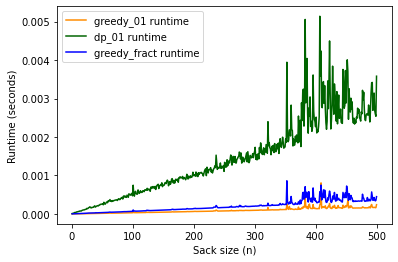

In [174]:
#the runtime plot with a sample size of 100 and sack size of 500. we can see that DP resmebles a linear trend while the greedy resemble a
#linear trend or a slower O(n) (lower slope)
sack_size = 500
sample_size = 100
plot_runtime(sack_size, sample_size)

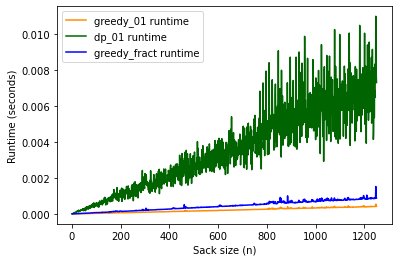

In [175]:
#if we don't sample at all, we can see that overall, the worst case runtime of the greedy approaches sometimes reach or surpass that of DP
sack_size = 1250
sample_size = 10
plot_runtime(sack_size, sample_size)

# Q3: Computational critique
Write a computational critique of your schedulers and contrast them with the algorithm you have produced
for the second assignment,

### A. Do all of these implementations make use of the same data structures?
- Yes, in the first implementation, I used a priority queue through min-heap data structure that I implemented from scratch, and here I used it again thing. There was no need to change the queue and heap implementation as it gives me conveniently gives me the maximum element in O(1) for the pop, O(logn) for the heapify afterwards. This process is run n times for a number of n tasks executed, then the overall runtime is O(nlogn). Since I only changed the amount of tasks that go through the queue at each run, the old heap and queue implementation are intact.

Additionally, here are the reasons why a priority queue using min-heap is an optimal choice in this case. The following part is word for word from my old scheduler (Day in the life of a minervan 1) assignment (Badra, 2021) as if I would have written it again (as nothing changed), my wording would have been the same anyways:

The priority queue with min-heap justification from the old scheduler assignment: 
"For this program, I execute tasks according to their priorities. Thus, I need to be able to continously look up tasks with the highest priority. Thus, I implemented a priority queue using a min heap, where I access the maximum priority element through these following steps:
1. Heapifying a list of tuples of the *not_yet_started* tasks, where each tuple is in this format: (task_id, task_priority_Score) (O(logn)), called O(n) times, so the overall runtime is O(nlogn)
2. Searching for the max element in between all the non-leaf/sterile nodes and returning it
3. Apply min_heapify again
While a max heap would have done the same task here, I wanted to implement a min-heap as its min-heapify method takes less time than the max_heapify method would. The reason is that with a max-heap, to get the, I would have to pop the root node. Accordingly, I would have to apply heapify on *ALL* the sterile/non-leaf nodes at the bottom level. Meanwhile, for my min-heap, as I always pop on of the sterile/non leaf nodes to get the max, I *_don't_* have top heapify ALL the non-leaf nodes to heapify the tree. Instead, using a method I wrote to compute all different generation parent (parents at different) levels for any node, I can trace back all the parents for any child node. Accordingly, I can only apply min_heapify to half of the tree that has the max popped node parents instead of the whole tree as with max heap. This way, I cut the runtime by half as now the min_heapify is going to be run n/2 times instead of n. For computational complexity as we care about very large input sizes, this reduction from n/2 to n wouldn't matter as they're both still linear time, but I still wanted to implement in because I know the input size wouldn't get too high for my schduler anyways.

*P.S:* I use a seperate priority queue implementation for executing multitasking items for each task" (Badra, 2021)

### B. Do they address all the concerns raised in question 1?
- As discussed in question 1, I identified 4 problems:
1. Not being able to break down tasks
2. Not being able to run the schedule for a varialble time length
3. The subtasks being treated as child tasks of main tasks which doesn't allow them to have their independed attributes
4. Multi-tasking executing tasks that are not in the same location together
- As mentioned in question 1, given the scope of this assignment and my constraint of limited time in this part of the semester, I only adressed the first two problems in my code. As a result, we can see that I FULLY addressed the first and second problems as shown in Q2.C

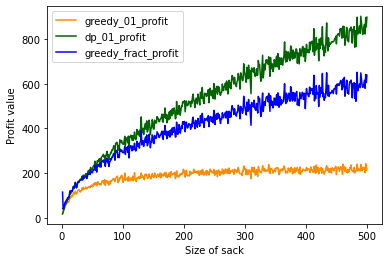

In [176]:
sack_size = 500
sample_size = 100
plot_profit(sack_size, sample_size)

### C. What are the metrics that you are using to compare the schedule and the scheduler efficiencies?
- For choosing between my three knapsack implementations, I wrote a function (`def plot_profit(sack_size, n_samples)`) that measures the collective profit each algorithm achieves with number of task ranging from 1 to 500 . And for each sack size, I sampled a 100 lists with different random values to obtain the average profit value for each sack (task) size. Accordingly, I found the dp_01 and greedy_fract achieve much more profit than greed_01. Meanwhile, the greedy_fract and dp_01 has similar profit over the long term so I resorted to runtime comparison here and chose fract_greedy as it's shown experimentally to be much faster than dp_01 in the average case. Also, given that I need the ability to divide/fraction tasks. Generally, for the *fractional* knapsack problem, greedy_fract would always be the best choice as implementing the *fractional algorithm in DP would use a EXTRA MEMORY*.Thus, even if my runtime experimental computation for dp_01 has a bug, a greedy algorithm would be better in either the 01 or fractional cases. In the meantime, my scheduler uses `Knapsacks.greedy_fract_sack(tasks_sack_dict, available_time)` to collect the task fractions leading to the maximum collective profit/priority for a given `available_time`.

- None of the my implemented algorithms have a non polynomial runtime (NP), then it can run regardless of the number of tasks within a second on almost any modern machine (for tasks up to 1000). And as my scheduler is made for users to help mitigate their bias towards less desirable tasks, then the ultimate measure for my scheduler is its practical efficiency. While evaluating this requires user experience research with interviews and trials, I informally tested my scheduler on a small sample of myself and my friends. According to severeal tests with 6 people, including me, the scheduler priority rank helped them prioritize tasks. Also, the fractional knapask feature helped them breakdown daunting tasks into smaller parts and optimize for productivity, especially for short available_time periods when no task would be completely done by within the limited available_time (available_time < task_duration). 